***
#  <span style="color:#9400D3"> Project - Applied Statistics

***

### <span style="color:#9400D3">Importing Required Python Modules

In [1]:
# Modules for Statistical Operations
import numpy as np
import pandas as pd
from scipy import stats

# Modules for Hypothesis Analysis
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

# Modules for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Pre-setting Plot Style
font={'size':15}
plt.rc('font', **font)
plt.rc('xtick',labelsize=12)    
plt.rc('ytick',labelsize=12)
sns.set_style({'xtick.bottom':True,'ytick.left':True,'text.color':'#9400D3',
               'axes.labelcolor': 'blue','patch.edgecolor': 'black'})

# Module to Neglect Future Warnings
import warnings                             
warnings.simplefilter(action='ignore', category=FutureWarning)

***
## <span style="color:#9400D3"> Part ONE - **Question Based**
***

#### <span style="color:#9400D3">**1 Question.**

 Please refer the table below to answer below questions:

|Planned to purchase Product A | Actually placed and order for Product A|Actually placed and order for Product A |Total|
| --- | --- | --- | --- |
|  | Yes | No |  |
| Yes   | 400 | 100  | 500 |
| No    | 200 | 1300 | 1500|
| Total |600  |1400  | 2000|

  1. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order.

  2. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase.

In [2]:
# Solution:-

# The concept of Joint Probability is used to solve this problem.
T = 2000    # Total

# P(Planned & Actual) = (Planned and Actual) / Total
JP1 = 400/T               

# P(Planned & Actually GIVEN THAT Planned) = P(Planned & Actual) / P(Planned)
JP2 = JP1/(500/T)         

print(f'''Answers:-\n\n 1. Joint probability of people who planned to purchase      = {JP1}
    & actually placed an order ''')
print('')
print(f''' 2. Joint probability of the people who planned to purchase  = {JP2}
    & actually placed an order, given that people planned 
    to purchase.''')

Answers:-

 1. Joint probability of people who planned to purchase      = 0.2
    & actually placed an order 

 2. Joint probability of the people who planned to purchase  = 0.8
    & actually placed an order, given that people planned 
    to purchase.


***
#### <span style="color:#9400D3">**2. Question.**

An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following questions.
    
&emsp;   A. Probability that none of the items are defective?

&emsp;   B. Probability that exactly one of the items is defective?

&emsp;   C. Probability that two or fewer of the items are defective?

 &emsp;  D. Probability that three or more of the items are defective ?

In [3]:
# Solution:-

# The concept of Binomial Distribution is used to solve this problem.
p = 0.05
n = 10

# For none of the items are defective, k=0
P1 = stats.binom.pmf(0,n,p)     

# For exactly one of the items is defective, k=1
P2 = stats.binom.pmf(1,n,p)    

# For two or fewer of the items are defective, k<=2
P3 = 0
for i in range(0,3):
    P3 += stats.binom.pmf(i,n,p)     

# For three or more of the items are defective, k>=3
P4 = 0
for i in range(3,11):
    P4 += stats.binom.pmf(i,n,p)  
    
print('Answers:-\n\n A. Probability that none of the items are defective          =',round(P1,3))
print(' B. Probability that exactly one of the items is defective    =',round(P2,2))
print(' C. Probability that two or fewer of the items are defective  =',round(P3,2))
print(' D. Probability that three or more of the items are defective =',round(P4,2))

Answers:-

 A. Probability that none of the items are defective          = 0.599
 B. Probability that exactly one of the items is defective    = 0.32
 C. Probability that two or fewer of the items are defective  = 0.99
 D. Probability that three or more of the items are defective = 0.01


***
#### <span style="color:#9400D3"> **3. Question.**

  A car salesman sells on an average 3 cars per week.
   
&emsp;   A. Probability that in a given week he will sell some cars.
   
&emsp;   B. Probability that in a given week he will sell 2 or more but less than 5 cars.
   
&emsp;   C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per-week.

#Answers:-

 A. Probability that in a given week he will sell some cars                      = 0.95

 B. Probability that in a given week he will sell 2 or more but less than 5 cars = 0.62
 
 C. Plot showing Poisson distribution function for cumulative probability of cars sold 
    per-week vs number of cars sold per-week:-


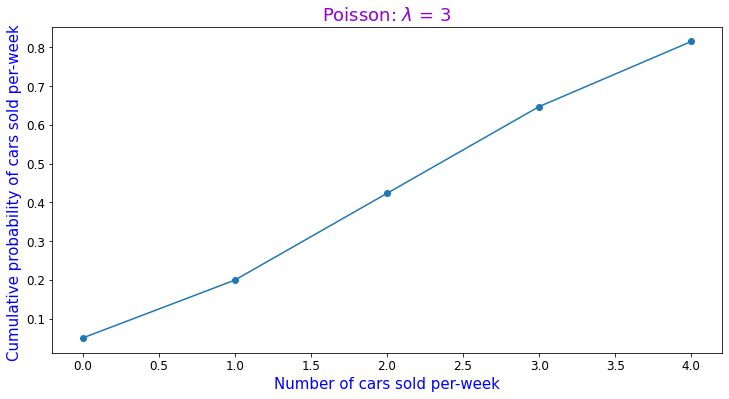

In [4]:
# Solution:-

# The concept of Poisson distribution is used to solve this problem.
m = 3    # Average OR Mean

# Sell some cars, which means "1 or more". i.e P(k>0) = 1 - P(k=0)
P1 = 1 - stats.poisson.pmf(0,m)

# Sell 2 or more but less than 5 cars, i.e P(2<=k<5)
P2 = 0
for i in range(2,5):
    P2 += stats.poisson.pmf(i,m)

print('#Answers:-\n\n A. Probability that in a given week he will sell some cars                      =',
      round(P1,2))
print('\n B. Probability that in a given week he will sell 2 or more but less than 5 cars =',round(P2,2))
print(''' \n C. Plot showing Poisson distribution function for cumulative probability of cars sold 
    per-week vs number of cars sold per-week:-''') 

# Plotting the poisson distribution function for cumulative probability    
x = range(0,5)   
y = stats.poisson.cdf(x,m)

plt.figure(figsize=(12,6))
plt.plot(y,'o-')
plt.title('Poisson: $\lambda$ = %i ' % m)
plt.xlabel('Number of cars sold per-week')
plt.ylabel('Cumulative probability of cars sold per-week ')
plt.show()


***
#### <span style="color:#9400D3">**4. Question:**

Accuracy in understanding orders for a speech based bot at a restaurant is important for the
Company X which has designed, marketed and launched the product for a contactless delivery due to the
COVID-19 pandemic. Recognition accuracy that measures the percentage of orders that are taken correctly is
86.8%. Suppose that you place order with the bot and two friends of yours independently place orders with
the same bot. Answer the following questions.

&emsp;A. What is the probability that all three orders will be recognised correctly?

&emsp;B. What is the probability that none of the three orders will be recognised correctly?

&emsp;C. What is the probability that at least two of the three orders will be recognised correctly?

In [5]:
# Solution:-

# The concept of Binomial Distribution is used to solve this problem.
p_crt = 0.868
p_incrt = 1 - p_crt 


# All three orders will be recognised correctly
P1 = stats.binom.pmf(3,3,p_crt)

# None of the three orders will be recognised correctly
P2 = stats.binom.pmf(3,3,p_incrt)

# At least two of the three orders will be recognised correctly
P3 = stats.binom.pmf(2,3,p_crt) + stats.binom.pmf(3,3,p_crt)

print('Answers:-\n\n A. Probability that all three orders will be recognised correctly                 =',
      round(P1,3))
print(' B. Probability that none of the three orders will be recognised correctly         =',round(P2,3))
print(' C. Probability that at least two of the three orders will be recognised correctly =',round(P3,3))

Answers:-

 A. Probability that all three orders will be recognised correctly                 = 0.654
 B. Probability that none of the three orders will be recognised correctly         = 0.002
 C. Probability that at least two of the three orders will be recognised correctly = 0.952


***
#### <span style="color:#9400D3">**5. Question.**
A group of 300 professionals sat for a competitive exam. The results show the information of
marks obtained by them have a mean of 60 and a standard deviation of 12. The pattern of marks follows a
normal distribution. Answer the following questions.

&emsp;A. What is the percentage of students who score more than 80.

&emsp;B. What is the percentage of students who score less than 50.

&emsp;C. What should be the distinction mark if the highest 10% of students are to be awarded distinction?

In [6]:
# Solution:-

# The concept of Normal Distribution is used to solve this problem.
mean = 60
sd = 12

# Percentage of students who score more than 80

z = (80-mean)/sd            # Z score

P1 = (1-stats.norm.cdf(z))*100   # Calculating Percentage

# Percentage of students who score less than 50

z = (50-mean)/sd

P2 = (stats.norm.cdf(z))*100

# highest 10% of students are to be awarded distinction

z = abs(stats.norm.ppf(0.10))   # Z score obtained by probability

x = z*sd + mean

print('Answers:-\n\n A. Percentage of students who score more than 80                             =',
      round(P1,2),'%')
print(' B. Percentage of students who score less than 50                             =',round(P2,2),'%')
print(' C. Distinction mark if highest 10% of students are to be awarded distinction =',round(x))

Answers:-

 A. Percentage of students who score more than 80                             = 4.78 %
 B. Percentage of students who score less than 50                             = 20.23 %
 C. Distinction mark if highest 10% of students are to be awarded distinction = 75


***
#### <span style="color:#9400D3">**6. Question.**

Explain 1 real life industry scenario [other than the ones mentioned above] where you can use the
concepts learnt in this module of Applied statistics to get a data driven business solution.

#### **Answer:-**
<br>
<b>Industry Scenario:- Transportation Industry</b>
<br><br>

&emsp; *In transportation industry we have concept of Data Science being used with the help of Statistics, to make transportation more efficient and easy.* 
<br><br>
&emsp;   *Let’s take 'Uber' as an example here. Uber has 8 million users, with 160,000+ people driving for Uber across 449 cities in 66 countries and has done more than 1 billion Uber trips.*
<br><br>
&emsp;   *Looking at this data we can say Uber generates and uses a huge amount of data regarding drivers, their vehicles, locations, every trip from every vehicle, etc. All this data is analyzed and then used to predict supply, demand, location of drivers, and fares that will be set for every trip.*
<br><br>
&emsp;   *Usage of Concept of Descriptive Statistics:- For example when we choose a route to save fuel and time, based on our knowledge of having taken that particular route sometime in the past. In this case, we analyzed and made use of the data that we had previously acquired on account of our experience, and then we used it to make a smart decision.*
<br><br>
 &emsp;  *Lets take a standard approaches in statistics, such as regression analysis, are concerned with quantifying how changes in X are associated with changes in Y. This concept is used in Uber like looking at identify customer pain points, inform product development, and provide a more personalized experience. For example, if we know that users are submitting customer support tickets due to a lack of clarity around how to use a new feature and not dissatisfaction with the feature itself, we can focus on improving the communications around how to use this feature rather than updating or decommissioning the feature.*
<br><br>
&emsp;   *In this way transportation industry uses varius statistical methods to provide a good service to the customers!*
   
***

### <span style="color:#9400D3">-------------------------------------------------- End of Part ONE -------------------------------------------------------

***
# <span style="color:#9400D3">Part TWO - **Project Based**
***

**DOMAIN:** Sports
<br><br>
**CONTEXT:** Company X manages the men's top professional basketball division of the American league system.
The dataset contains information on all the teams that have participated in all the past tournaments. It has data
about how many baskets each team scored, conceded, how many times they came within the first 2 positions,
how many tournaments they have qualified, their best position in the past, etc.
<br><br>
**DATA DESCRIPTION:** Basketball.csv - The data set contains information on all the teams so far participated in
all the past tournaments.
<br><br>
**ATTRIBUTE INFORMATION:**
1. Team: Team’s name
2. Tournament: Number of played tournaments.
3. Score: Team’s score so far.
4. PlayedGames: Games played by the team so far.
5. WonGames: Games won by the team so far.
6. DrawnGames: Games drawn by the team so far.
7. LostGames: Games lost by the team so far.
8. BasketScored: Basket scored by the team so far.
9. BasketGiven: Basket scored against the team so far.
10. TournamentChampion: How many times the team was a champion of the tournaments so far.
11. Runner-up: How many times the team was a runners-up of the tournaments so far.
12. TeamLaunch: Year the team was launched on professional basketball.
13. HighestPositionHeld: Highest position held by the team amongst all the tournaments played.
<br><br>
**PROJECT OBJECTIVE:** Company’s management wants to invest on proposal on managing some of the best
teams in the league. The analytics department has been assigned with a task of creating a report on the
performance shown by the teams. Some of the older teams are already in contract with competitors. Hence
Company X wants to understand which teams they can approach which will be a deal win for them.
<br><br>
**Steps and tasks:**
1. Read the data set, clean the data and prepare a final dataset to be used for analysis.
2. Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get a data
driven insights on recommending which teams they can approach which will be a deal win for them.. Also as a data
and statistics expert you have to develop a detailed performance report using this data.

    *Hint: Use statistical techniques and visualisation techniques to come up with useful metrics and reporting. Find out
    the best performing team, oldest team, team with highest goals, team with lowest performance etc. and many more.
    These are just random examples please use your best analytical approach to build this report. You can mix match
    columns to create new ones which can be used for better analysis. Create your own features if required. Be highly
    experimental and analytical here to find hidden patterns. Use graphical interactive libraries to enable you to publish
    interactive plots in python.*

3. Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity,
veracity etc. on the data points collected by the association to perform a better data analysis in future.

***
# <span style="color:#9400D3">1. Read the Data set, clean the data and prepare a final dataset to be used for analysis.
***

## <span style="color:#9400D3">Reading data set as a Dataframe and Cleaning the data

In [7]:
# Loading data file to a variable and creating dataframe
data = pd.read_csv('Basketball.csv')

# Getting Shape in terms of Rows and Columns
print('Loaded data consist:-\n Number of Rows    =',data.shape[0],'\n Number of Columns =',data.shape[1])

Loaded data consist:-
 Number of Rows    = 61 
 Number of Columns = 13


In [8]:
# Getting brief information regarding data class, index range, column names, non-null counts and data types of 
# each column of the dataframe

print('Brief information about the data:-\n')
data.info()

Brief information about the data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [9]:
# Analysing the dataframe to do cleaning operations on it if required!

data.head(10)  # Gives top 10 rows of the dataframe

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934-35,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,-,-,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,-,1,1939-40,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,-,1932-33,1


**Comments:-**

 &emsp;&emsp; *By observing the above data we can say that the data has empty values denoted by symbol '-'. So such empty values should be cleaned. But the empty values in the colums **'TournamentChampion'** and **'Runner-up'** are required for the analysis.<br>
      <br>&emsp;&emsp;So except these columns, all the empty values should be cleaned and the empty values of those required colums should be filled with '0'. Also the column **'TeamLaunch'** is not proper format, so it should be made in proper format.*


In [10]:
# Step 1. Removing the required colums.

data1 = data.drop(['TournamentChampion','Runner-up'],axis=1) 
# Required Colums are dropped and remaing data is assigned to variable a

print('Shape of Data:-',data1.shape,'\n')  # Now shape should be 61x11


# Step 2. Coverting all empty values('-') to NaN values if any!

data1 = data1[data1 != '-']    # Empty values ('-') are coverted to NaN values


# Step 3. Getting all rows where NaN values are Present.

data1 = data1[data1.isna().any(axis=1)]     # Getting rows that have NaN values
print('Number of rows that have NaN Values =',len(data1))
data1

Shape of Data:- (61, 11) 

Number of rows that have NaN Values = 1


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TeamLaunch,HighestPositionHeld
60,Team 61,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017~18,9


<br>*Now we have rows which have NaN values and these rows should be cleaned off.*

In [11]:
# Cleaning the dataframe having NaN values in it

data.drop(data1.index,inplace=True)   # Dropping the rows with NaN values

In [12]:
# Replacing empty values('-') of Required Coolumns by '0'

data.replace('-',0,inplace=True)

In [13]:
# Converting column 'TeamLaunch' to string to make it proper

data['TeamLaunch']=data['TeamLaunch'].astype('string')  # Converting to string

data['TeamLaunch']=data['TeamLaunch'].str[:4]   # Getting the year of launch upto 4 places

***
## <span style="color:#9400D3">Preparing a Final Dataset to be used for Analysis

In [14]:
# Analysing Data types of the dataframe
print('Data types Before Conversion:-')
data.dtypes.to_frame(name = 'Data Types')

Data types Before Conversion:-


,Data Types
Team,object
Tournament,int64
Score,object
PlayedGames,object
WonGames,object
DrawnGames,object
LostGames,object
BasketScored,object
BasketGiven,object
TournamentChampion,object


In [15]:
# Converting the Objects to relevant Datatypes

data['Team']=data['Team'].astype('string')  # Converting Teams to String

clm = ['Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven',
       'TournamentChampion','Runner-up','TeamLaunch']    # List of Columns to be converted to integer data type

data[clm]=data[clm].astype(int)  # Converting rest columns to integer values

print('Data types After Conversion:-')
data.dtypes.to_frame(name = 'Data Types')


Data types After Conversion:-


,Data Types
Team,string
Tournament,int64
Score,int32
PlayedGames,int32
WonGames,int32
DrawnGames,int32
LostGames,int32
BasketScored,int32
BasketGiven,int32
TournamentChampion,int32


In [16]:
# Final Dataset for Analysis
print('Final Dataset for Analysis:-')
print('Loaded data consist:-\n Number of Rows    =',data.shape[0],'\n Number of Columns =',data.shape[1])
data.head(10)

Final Dataset for Analysis:-
Loaded data consist:-
 Number of Rows    = 60 
 Number of Columns = 13


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1


<br> *Now our dataset is ready to perform statistical analysis.*

***
## <span style="color:#9400D3">2. Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get a datadriven insights on recommending which teams they can approach which will be a deal win for them.
***

## <span style="color:#9400D3"> Performing Statistical Analysis and EDA on the Data

In [17]:
# Describing the data interms of count, mean, standard deviation, and 5 point summary

print('Brief Summary of Dataset:-')

data.describe()  

# Here we can know count, mean, standard deviation and 5 point summary of each cloumn of our dataset

Brief Summary of Dataset:-


,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,24.383333,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,1.45000,1.433333,1957.950000,7.050000
std,26.884620,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,5.51554,4.574679,26.646732,5.315232
min,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,0.00000,0.000000,1929.000000,1.000000
25%,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,0.00000,0.000000,1934.750000,3.000000
50%,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,0.00000,0.000000,1950.500000,6.000000
75%,39.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,0.00000,0.000000,1977.250000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.00000,25.000000,2016.000000,20.000000


In [18]:
# Checking skewness of the data attributes

print('Skewness of all attributes:-')  
data.skew().to_frame(name='Skewness')  # Gives skewness of all attributes

Skewness of all attributes:-


,Skewness
Tournament,1.197176
Score,1.574104
PlayedGames,1.123454
WonGames,1.786067
DrawnGames,0.984899
LostGames,0.880596
BasketScored,1.758058
BasketGiven,0.958164
TournamentChampion,4.734845
Runner-up,4.321794


In [19]:
# Getting Interquartile Range of data attributes

print('IQR of all attributes:-')
(data.quantile(0.75) - data.quantile(0.25)).to_frame(name='Interquartile Range')  # Gives IQR

IQR of all attributes:-


,Interquartile Range
Tournament,35.00
Score,1256.25
PlayedGames,1230.00
WonGames,398.00
DrawnGames,305.25
LostGames,500.75
BasketScored,1515.25
BasketGiven,1765.25
TournamentChampion,0.00
Runner-up,0.00


In [20]:
# Checking Variance data attributes

print('Variance of all attributes:-')  
data.var().to_frame(name='Variance')  # Gives Variance of all colums of dataset

Variance of all attributes:-


,Variance
Tournament,7.227828e+02
Score,1.295825e+06
PlayedGames,7.699455e+05
WonGames,1.668570e+05
DrawnGames,4.079815e+04
LostGames,8.673534e+04
BasketScored,2.286337e+06
BasketGiven,1.354772e+06
TournamentChampion,3.042119e+01
Runner-up,2.092768e+01


In [21]:
# Checking Covariance related with all attributes

print('Covariance between all attributes:-')
data.cov() # Gives Covariance of the dataset

Covariance between all attributes:-


,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
Tournament,722.782768,3.003033e+04,2.355925e+04,10671.614124,5372.170904,7516.715537,3.962956e+04,3.090991e+04,87.383898,79.441243,-429.234746,-101.172034
Score,30030.333051,1.295825e+06,9.785666e+05,463704.696610,220292.385593,294612.626271,1.715454e+06,1.250509e+06,4489.268644,3982.835593,-16335.672034,-4049.124576
PlayedGames,23559.249153,9.785666e+05,7.699455e+05,346774.216949,176166.940678,247031.154237,1.286941e+06,1.011131e+06,2783.174576,2541.345763,-13590.384746,-3316.361017
WonGames,10671.614124,4.637047e+05,3.467742e+05,166857.049718,77508.658192,102428.853672,6.172252e+05,4.401460e+05,1696.289831,1490.917514,-5882.320339,-1406.527119
DrawnGames,5372.170904,2.202924e+05,1.761669e+05,77508.658192,40798.145480,57867.608757,2.877725e+05,2.333322e+05,560.792373,523.014124,-3068.826271,-773.258475
LostGames,7516.715537,2.946126e+05,2.470312e+05,102428.853672,57867.608757,86735.338701,3.820110e+05,3.376645e+05,526.338136,527.657062,-4642.466949,-1136.736441
BasketScored,39629.558475,1.715454e+06,1.286941e+06,617225.191525,287772.461864,382010.997458,2.286337e+06,1.638664e+06,6203.568644,5471.794915,-22166.405932,-5213.356780
BasketGiven,30909.909040,1.250509e+06,1.011131e+06,440145.958192,233332.166667,337664.535028,1.638664e+06,1.354772e+06,3027.689831,2840.439548,-18885.327119,-4499.689831
TournamentChampion,87.383898,4.489269e+03,2.783175e+03,1696.289831,560.792373,526.338136,6.203569e+03,3.027690e+03,30.421186,24.513559,-42.146610,-8.921186
Runner-up,79.441243,3.982836e+03,2.541346e+03,1490.917514,523.014124,527.657062,5.471795e+03,2.840440e+03,24.513559,20.927684,-38.672881,-8.733898


Heatmap showing Correlation of data attributes:-


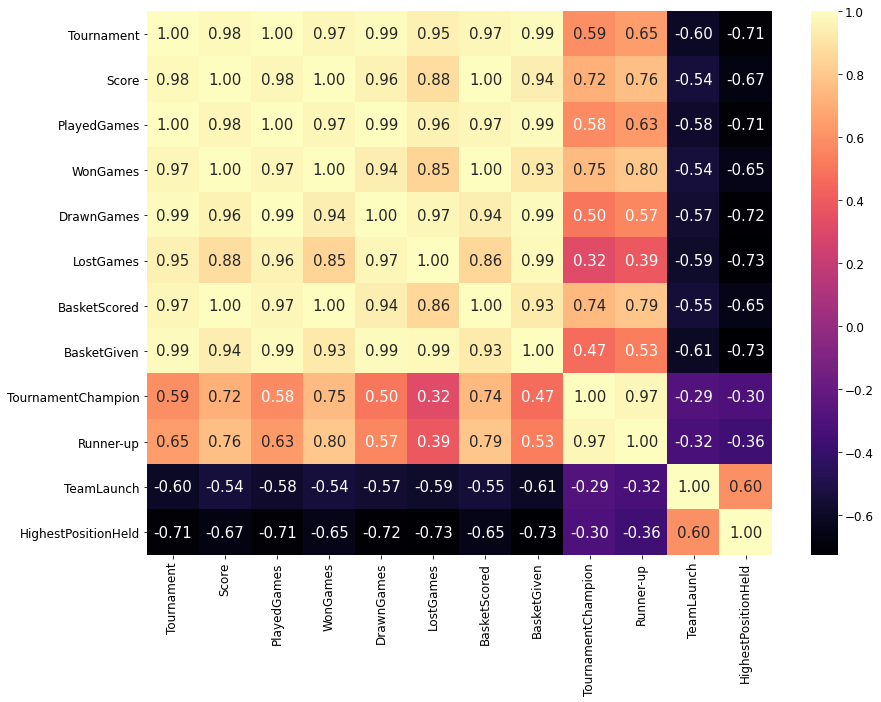

In [22]:
# Plotting heatmap for checking Correlation

print('Heatmap showing Correlation of data attributes:-')
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True, fmt= '.2f',cmap="magma")
plt.show()

*By Observing above analytics we can say,*
* *Based on skewness, most of the attributes are Highly Skewed(skewness greater that +/- 1). This makes data to be one sided!*
* *Variance of the data shows that most of data is highly spread.*
* *Heatmap shows that most of the data is positively correlated.*

***
## <span style="color:#9400D3">Analysing Scores and Score Rates of Teams

In [23]:
# Scores of Teams

data[['Team','Score']].head(10)

,Team,Score
0,Team 1,4385
1,Team 2,4262
2,Team 3,3442
3,Team 4,3386
4,Team 5,3368
5,Team 6,2819
6,Team 7,2792
7,Team 8,2573
8,Team 9,2109
9,Team 10,1884


In [24]:
# To find Team with Highest Score

print('Team with Highest Score:-')
data[data['Score']==data['Score'].max()]

Team with Highest Score:-


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1


In [25]:
# To find Team with Lowest Score

print('Team with Lowest Score:-')
data[data['Score']==data['Score'].min()]

Team with Lowest Score:-


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955,15


Mean   = 916.45 
Median = 395.5 
Mode   = 188 
IQR    = 1256.25


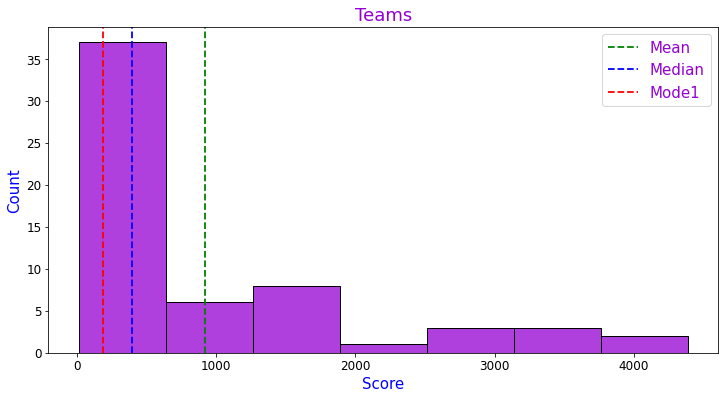

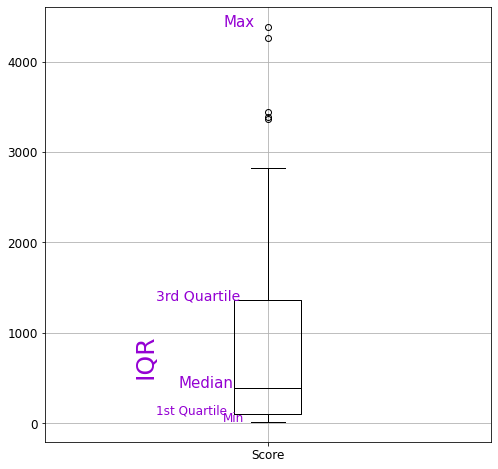

In [26]:
# Getting Mean, Median, Mode and IQR for Score

mean = data['Score'].mean()    
median = data['Score'].median()
mode = data['Score'].mode()
iqr = data['Score'].quantile(0.75) - data['Score'].quantile(0.25)

print('Mean   =',mean,'\nMedian =',median,'\nMode   =',mode[20],'\nIQR    =',iqr)

# Plotting histogram for Score 
plt.figure(figsize=(12,6))
plt.axvline(mean,color='green',label='Mean',linestyle='--', linewidth=1.8) 
plt.axvline(median,color='blue',label='Median',linestyle='--', linewidth=1.8)
plt.axvline(mode[20],color='red',label='Mode1',linestyle='--', linewidth=1.8)

sns.histplot(data=data,x='Score', color="#9400D3").set_title('Teams');
plt.legend()
plt.show()

# Plotting box plot for better understanding and to know about extreme values 
data.boxplot(column='Score',figsize=(8,8),color='black');
plt.text(x=0.75,y=1360.5, s="3rd Quartile",size=14)
plt.text(x=0.8, y=395.5 , s="Median")
plt.text(x=0.75, y=104.25, s="1st Quartile",size=12)
plt.text(x=0.9, y=14, s="Min",size=12)
plt.text(x=0.9, y=4385, s="Max")
plt.text(x=0.7, y=550, s="IQR", rotation=90, size=25)
plt.show()



In [27]:
# To find Score Rate of Teams played in games

srate = round(data['Score']/data['PlayedGames'],2)
srate = pd.DataFrame(srate,columns=['Score Rate'])
team = pd.DataFrame(data['Team'])

# Score Rates of All Teams
print('Table Showing Score Rates of Teams:-')
srt = team.join(srate)
srt.head(10)

Table Showing Score Rates of Teams:-


,Team,Score Rate
0,Team 1,1.59
1,Team 2,1.54
2,Team 3,1.32
3,Team 4,1.27
4,Team 5,1.22
5,Team 6,1.17
6,Team 7,1.06
7,Team 8,1.12
8,Team 9,1.06
9,Team 10,1.09


In [28]:
# Team with Highest Score Rate

print('Team with Highest Score Rate:-')
srt[srt['Score Rate']==srt['Score Rate'].max()]

Team with Highest Score Rate:-


,Team,Score Rate
0,Team 1,1.59


In [29]:
# Team with Lowest Score Rate

print('Team with Lowest Score Rate:-')
srt[srt['Score Rate']==srt['Score Rate'].min()]

Team with Lowest Score Rate:-


,Team,Score Rate
59,Team 60,0.47


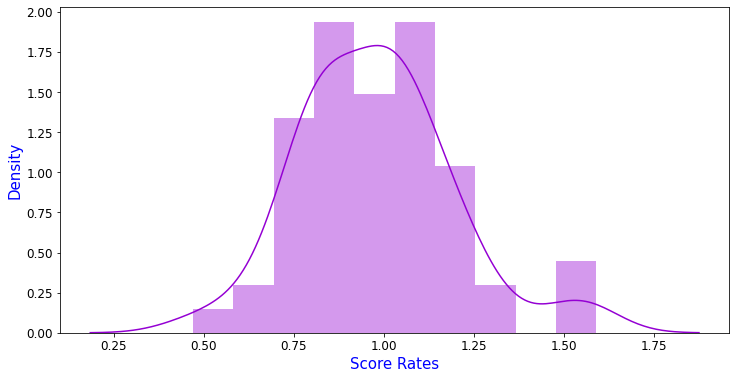

In [30]:
# Plotting Distribution plot to know skewness of Score Rate

plt.figure(figsize=(12,6))
sns.distplot(srate,color='#9400D3',axlabel='Score Rates');
plt.show()

*Looking at the plots we can notice,*
* *The skewness of Score is positive or right skewed distribution. And also Mean > Median.*
* *When we look at distribution of Score Rates, we can notice that score rate are little skewed or almost equally distributed.*
* *Most of the score made by each teams is less than 1000, since the maximum observations lies between 0 and 1000.*
* *There are very few teams who scored above 2000.*
* *There are some extreme values / outliers, which increases variability and hence we say that the data is not equally distributed.*
* *Looking at the heatmap we can say Score has highest positive correlation with all the attributes.*

***
## <span style="color:#9400D3">Analysing Winning Percentages of Teams

In [31]:
# Calculating Winning Percentage of all Teams

# Here the claculation consist of the number of games win, number of games draw and total played games

win_percent = round(((data['WonGames']+data['DrawnGames']*0.5)/data['PlayedGames'])*100,2)
WP = pd.DataFrame(win_percent,columns=['Winning_Percentage(%)'])
team = pd.DataFrame(data['Team'])
win_team = team.join(WP)

print('Below table showing Winning Percentages of Teams')
win_team.head(15)

Below table showing Winning Percentages of Teams


,Team,Winning_Percentage(%)
0,Team 1,69.62
1,Team 2,67.61
2,Team 3,58.91
3,Team 4,56.12
4,Team 5,55.23
5,Team 6,52.14
6,Team 7,47.68
7,Team 8,50.07
8,Team 9,48.29
9,Team 10,47.80


In [32]:
# To find the Team which has highest winning percentage

print('Highest Winning Team is:-')
win_team[win_team['Winning_Percentage(%)']==win_team['Winning_Percentage(%)'].max()]

Highest Winning Team is:-


,Team,Winning_Percentage(%)
0,Team 1,69.62


In [33]:
# To find the Team which has lowest percentage

print('Lowest Winning Team is:-')
win_team[win_team['Winning_Percentage(%)']==win_team['Winning_Percentage(%)'].min()]

Lowest Winning Team is:-


,Team,Winning_Percentage(%)
59,Team 60,23.33


In [34]:
# To find the Average winning percentage

mean = round(win_team['Winning_Percentage(%)'].mean(),2)
print('Average winning percentage =',mean,'%')

Average winning percentage = 43.17 %


In [35]:
# To find top 10 teams having high winning percentage compared to other teams
Top_teams = win_team.sort_values(by=['Winning_Percentage(%)'],ascending=False)
print('Top 10 Teams having High Winning Percentage are:-')
t10win = Top_teams.head(10)
t10win

Top 10 Teams having High Winning Percentage are:-


,Team,Winning_Percentage(%)
0,Team 1,69.62
1,Team 2,67.61
2,Team 3,58.91
3,Team 4,56.12
4,Team 5,55.23
20,Team 21,54.49
5,Team 6,52.14
7,Team 8,50.07
10,Team 11,49.61
8,Team 9,48.29


In [36]:
# To find Number of Teams falls under given Range of Winning Percentage

# Getting data
wp_data = win_team['Winning_Percentage(%)']

# Creating function that counts values in range
def count(percent_list,lower_limit,upper_limit):
    counter = 0 
    for i in percent_list:
        if i>= lower_limit and i< upper_limit:
            counter+= 1 
    return counter

# Creating dataframe
range_counts = pd.DataFrame(data=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90',
                                  '90-100','----------------------------------------------','TOTAL'],
                            columns=['Range of Winning Percentage (%)'])

range_counts['Number of Teams'] = [count(wp_data,0,10),count(wp_data,10,20),count(wp_data,20,30),
                                   count(wp_data,30,40),count(wp_data,40,50),count(wp_data,50,60),
                                   count(wp_data,60,70),count(wp_data,70,80),count(wp_data,80,90),
                                   count(wp_data,90,100),'-------------------------------',len(wp_data)]

print('Table showing number of Teams falls under given Range of Winning Percentage')
range_counts

Table showing number of Teams falls under given Range of Winning Percentage


,Range of Winning Percentage (%),Number of Teams
0,0-10,0
1,10-20,0
2,20-30,2
3,30-40,18
4,40-50,32
5,50-60,6
6,60-70,2
7,70-80,0
8,80-90,0
9,90-100,0


Plot Showing Winning Percentages of Teams:-


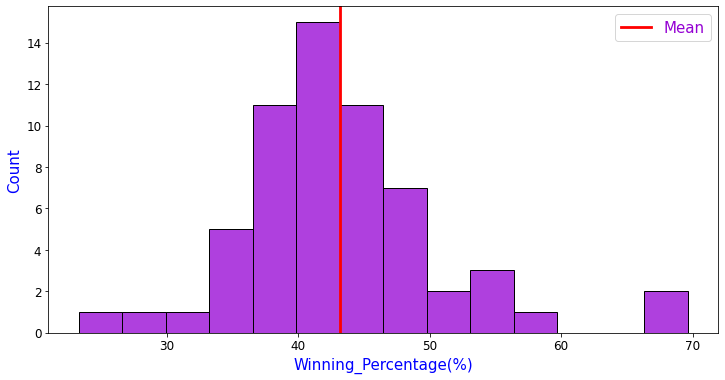

In [37]:
# Plotting histogram for winning percentages of teams

print('Plot Showing Winning Percentages of Teams:-')
plt.figure(figsize=(12,6))
plt.axvline(mean,color='red',label='Mean', linewidth=2.8)
plt.legend()
sns.histplot(win_team['Winning_Percentage(%)'], color='#9400D3');

*By observing the above datas we can say,*
* *'Team 1' has highest winning rate and can perform well when compared to other teams.*
* *'Team 60' has lowest winning rate with only 23.33% which says that its performance is poor compared to other teams.*
* *By observing the plot, maximum of winning percentages of the teams lies between 30-50%.*
* *All the teams has an average of 43.17% winning percentage which means on an average the teams has lost more matches than winnig it.*
* If Company wants to choose top best teams based on Winnings of the teams, then list of Top 10 best teams are provided above.

***
## <span style="color:#9400D3"> Analysing Tournament-Champions and Runner-ups of Teams

In [38]:
# To find the teams who won the Tournaments at least one time.

Twon = data[data['TournamentChampion']!=0]
print('Total teams who won Tournaments =',len(Twon['Team']))
print('\nTeams who won the Tournaments are:-')
Twon[['Team','TournamentChampion']]

Total teams who won Tournaments = 9

Teams who won the Tournaments are:-


,Team,TournamentChampion
0,Team 1,33
1,Team 2,25
2,Team 3,10
3,Team 4,6
4,Team 5,8
5,Team 6,1
7,Team 8,2
9,Team 10,1
10,Team 11,1


In [39]:
# To find the team who won the Tournament highest number of time

print('\nThe team who won the Tournament most of the time is -->')
mwt = Twon[Twon['TournamentChampion']==Twon['TournamentChampion'].max()]
mwt[['Team','TournamentChampion']]


The team who won the Tournament most of the time is -->


,Team,TournamentChampion
0,Team 1,33


In [40]:
# To find the teams who stood as Runner-up

Trp = data[data['Runner-up']!=0]
print('Total teams who stood as Runner-up =',len(Trp['Team']))
print('\nTeams who stood as Runner-up are:-')
Trp[['Team','Runner-up']]

Total teams who stood as Runner-up = 13

Teams who stood as Runner-up are:-


,Team,Runner-up
0,Team 1,23
1,Team 2,25
2,Team 3,8
3,Team 4,6
4,Team 5,7
5,Team 6,4
7,Team 8,3
8,Team 9,1
10,Team 11,5
13,Team 14,1


In [41]:
# To find the team who stood as Runner-up highest number of time

print('\nThe team who stood as Runner-up most of the time is -->')
mtr = Trp[Trp['Runner-up']==Trp['Runner-up'].max()]
mtr[['Team','Runner-up']]


The team who stood as Runner-up most of the time is -->


,Team,Runner-up
1,Team 2,25


In [42]:
# To find the teams who have either won the Tournament or stood as Runner-up 

print('Total Teams who won/Runner-up =',len(Twon.merge(Trp ,how='outer')))
print('\nTeams who have either won the Tournament or stood as Runner-up are:-')
wteam = Twon.merge(Trp ,how='outer')
wteam[['Team','TournamentChampion','Runner-up']]

Total Teams who won/Runner-up = 14

Teams who have either won the Tournament or stood as Runner-up are:-


,Team,TournamentChampion,Runner-up
0,Team 1,33,23
1,Team 2,25,25
2,Team 3,10,8
3,Team 4,6,6
4,Team 5,8,7
5,Team 6,1,4
6,Team 8,2,3
7,Team 10,1,0
8,Team 11,1,5
9,Team 9,0,1


In [43]:
# To find the teams who have won the Tournament and aslo stood as Runner-up 

print('Total Teams who won and also Runner-up =',len(Twon.merge(Trp)))
print('\nTeams who have won the Tournament and aslo stood as Runner-up are:-')
teams = Twon.merge(Trp)
teams[['Team','TournamentChampion','Runner-up']]

Total Teams who won and also Runner-up = 8

Teams who have won the Tournament and aslo stood as Runner-up are:-


,Team,TournamentChampion,Runner-up
0,Team 1,33,23
1,Team 2,25,25
2,Team 3,10,8
3,Team 4,6,6
4,Team 5,8,7
5,Team 6,1,4
6,Team 8,2,3
7,Team 11,1,5


Plot Showing TournamentChampion and Runner-up:-


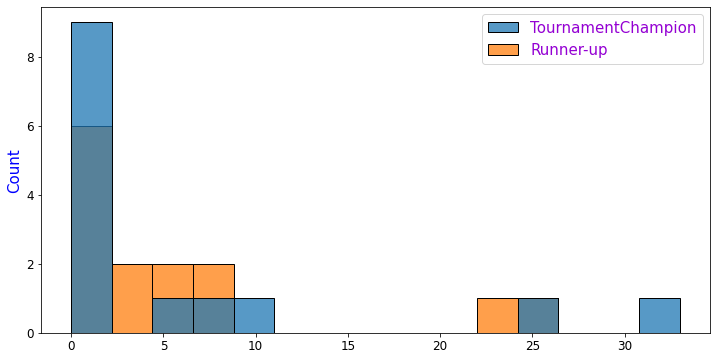

In [44]:
# To plot Histogram showing TournamentChampion and Runner-up

wor = wteam[['TournamentChampion','Runner-up']]

print('Plot Showing TournamentChampion and Runner-up:-')
plt.figure(figsize=(12,6))
sns.histplot(wor,bins=15);

In [45]:
# To find Performance Percentage based on Tournament

PP = round(((teams['TournamentChampion']+teams['Runner-up'])/teams['Tournament']*100),2)
TP = pd.DataFrame(PP,columns=['Tournament Performance %'])
team = pd.DataFrame(teams['Team'])
tp_team = team.join(TP)

print('Table showing Tournament Performance Percentage:-')
tp_team

Table showing Tournament Performance Percentage:-


,Team,Tournament Performance %
0,Team 1,65.12
1,Team 2,58.14
2,Team 3,22.50
3,Team 4,14.63
4,Team 5,17.44
5,Team 6,6.85
6,Team 8,7.14
7,Team 11,13.33


In [46]:
# To find Team with best performance in Tournaments

print('Team with best performance in Tournaments is,')
tp_team[tp_team['Tournament Performance %']==tp_team['Tournament Performance %'].max()]

Team with best performance in Tournaments is,


,Team,Tournament Performance %
0,Team 1,65.12


Plot Showing Tournament Performance Percentages:-


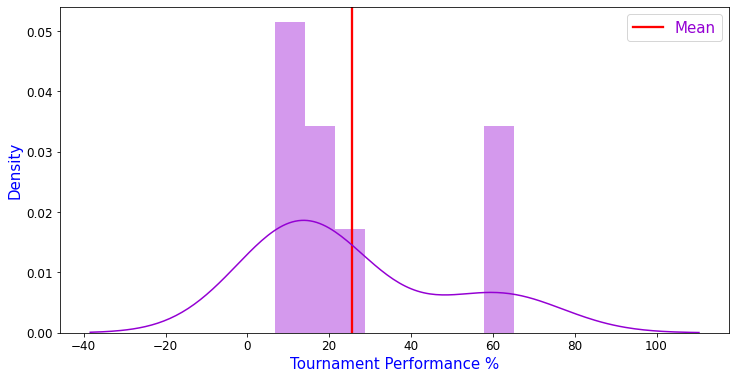

In [47]:
# Plotting Distribution plot for Performance percentages based on Tournaments

Tp = tp_team.sort_values(by=['Tournament Performance %'],ascending=False)
mean = round(tp_team['Tournament Performance %'].mean(),2)

print('Plot Showing Tournament Performance Percentages:-')
plt.figure(figsize=(12,6))
plt.axvline(mean,color='red',label='Mean', linewidth=2.3) 
plt.legend()
sns.distplot(Tp['Tournament Performance %'],bins=8, color='#9400D3');

*By observing above analytics we can say,*
* *Only few teams are able to win or be runner-up in the tournaments*
* *'Team 1' has won Tournaments highest number of times and 'Team 2' stood as Runner-up for maximum number of times.*
* *There are 8 teams who won the Tournament and aslo stood as Runner-up and among these teams company can choose based on Tournament Performance*

***
## <span style="color:#9400D3">Analysing Basket Scored and Given by the Teams

In [48]:
# Make data more efficient to use
basket = data[['Team','PlayedGames','BasketScored','BasketGiven']]
basket.head()

,Team,PlayedGames,BasketScored,BasketGiven
0,Team 1,2762,5947,3140
1,Team 2,2762,5900,3114
2,Team 3,2614,4534,3309
3,Team 4,2664,4398,3469
4,Team 5,2762,4631,3700


In [49]:
# To find Team with highest number of Basket Scored

print('Team with highest number of Basket Scored is:-')
basket[basket['BasketScored']==basket['BasketScored'].max()]

Team with highest number of Basket Scored is:-


,Team,PlayedGames,BasketScored,BasketGiven
0,Team 1,2762,5947,3140


In [50]:
# To find Team with lowest number of Basket Scored

print('Team with lowest number of Basket Scored is:-')
basket[basket['BasketScored']==basket['BasketScored'].min()]

Team with lowest number of Basket Scored is:-


,Team,PlayedGames,BasketScored,BasketGiven
59,Team 60,30,34,65


In [51]:
# To find Team with highest number of Basket Given

print('Team with highest number of Basket Given is:-')
basket[basket['BasketGiven']==basket['BasketGiven'].max()]

Team with highest number of Basket Given is:-


,Team,PlayedGames,BasketScored,BasketGiven
6,Team 7,2626,3609,3889


In [52]:
# To find Team with lowest number of Basket Given

print('Team with lowest number of Basket Given is:-')
basket[basket['BasketGiven']==basket['BasketGiven'].min()]

Team with lowest number of Basket Given is:-


,Team,PlayedGames,BasketScored,BasketGiven
55,Team 56,38,36,55


In [53]:
# To find Rate of Performance based on Basket Scored

rpb = round((basket['BasketScored']-basket['BasketGiven'])/basket['PlayedGames'],3)
rb = pd.DataFrame(rpb,columns=['Rate of Basket Scored'])
team = pd.DataFrame(basket['Team'])
rp_team = team.join(rb)

print('''Table Showing Rate of Performance Based on Basket Scored\n\nNote:- Negative sign of Rate indicates that there are more number
       of Basket-Given than the Basket-Scored by the Team!''')
rp_team.head(15)

Table Showing Rate of Performance Based on Basket Scored

Note:- Negative sign of Rate indicates that there are more number
       of Basket-Given than the Basket-Scored by the Team!


,Team,Rate of Basket Scored
0,Team 1,1.016
1,Team 2,1.009
2,Team 3,0.469
3,Team 4,0.349
4,Team 5,0.337
5,Team 6,0.127
6,Team 7,-0.107
7,Team 8,-0.001
8,Team 9,-0.083
9,Team 10,-0.193


In [54]:
# To find Teams with good basket rates

print('The teams with good basket rates are:-')
print('Total =',len(rp_team[rp_team['Rate of Basket Scored']>0]))
rp_team[rp_team['Rate of Basket Scored']>0]

The teams with good basket rates are:-
Total = 7


,Team,Rate of Basket Scored
0,Team 1,1.016
1,Team 2,1.009
2,Team 3,0.469
3,Team 4,0.349
4,Team 5,0.337
5,Team 6,0.127
20,Team 21,0.159


In [55]:
# Best Team based on Basket Rate

print('Best team based on basket rates is:-')
rp_team[rp_team['Rate of Basket Scored']==rp_team['Rate of Basket Scored'].max()]

Best team based on basket rates is:-


,Team,Rate of Basket Scored
0,Team 1,1.016


In [56]:
# Team which has least Basket Rate

print('Team which has least basket rates is:-')
rp_team[rp_team['Rate of Basket Scored']==rp_team['Rate of Basket Scored'].min()]

Team which has least basket rates is:-


,Team,Rate of Basket Scored
54,Team 55,-1.647


Plot Showing Rate of Performance based on Basket Scored:-


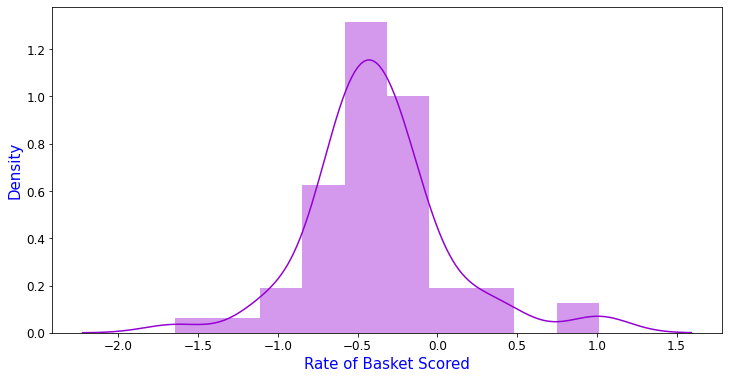

In [57]:
# Plotting distribution plot for basket rates

print('Plot Showing Rate of Performance based on Basket Scored:-')
plt.figure(figsize=(12,6))
sns.distplot(rp_team['Rate of Basket Scored'],bins=10,color='#9400D3');
plt.show()

*By observing above data we can say,*
* *There are very few teams whose rate of performance is above zero value.*
* *'Team 1' has very good basket rate and 'Team 55' has poor rate of performance based on basket scored.*
* *If Company want to look after the team with good basket rates then it can refer above table which shows the teams with good basket rates.*

***
## <span style="color:#9400D3">Analysing Experience of Teams

In [58]:
# To find out the experience of teams

met = data[['Team','Tournament','PlayedGames']]
tmet = met['Tournament']+met['PlayedGames']
met1 = pd.DataFrame(tmet,columns=['Experience'])
team = pd.DataFrame(met['Team'])
exp_team = team.join(met1)
print('Table showing experience of teams:-')
exp_team.head(15)

Table showing experience of teams:-


,Team,Experience
0,Team 1,2848
1,Team 2,2848
2,Team 3,2694
3,Team 4,2746
4,Team 5,2848
5,Team 6,2481
6,Team 7,2708
7,Team 8,2372
8,Team 9,2044
9,Team 10,1779


In [59]:
# To find Most Experienced teams

print('Most experienced teams:-')
print('Total =',len(exp_team[exp_team['Experience']==exp_team['Experience'].max()]))
exp_team[exp_team['Experience']==exp_team['Experience'].max()]

Most experienced teams:-
Total = 3


,Team,Experience
0,Team 1,2848
1,Team 2,2848
4,Team 5,2848


In [60]:
# To find least experienced teams

print('Least experienced teams:-')
print('Total =',len(exp_team[exp_team['Experience']==exp_team['Experience'].min()]))
exp_team[exp_team['Experience']==exp_team['Experience'].min()]

Least experienced teams:-
Total = 3


,Team,Experience
57,Team 58,31
58,Team 59,31
59,Team 60,31


In [61]:
# To find the average experience of teams

print('Average experience of teams =',round(exp_team['Experience'].mean(),2))

Average experience of teams = 834.48


In [62]:
# To find top 10 teams having highest experience

exp_team10 = exp_team.sort_values(by=['Experience'],ascending=False)
print('Table showing top 10 teams having highest experience:-')
exp_team10.head(10)

Table showing top 10 teams having highest experience:-


,Team,Experience
0,Team 1,2848
1,Team 2,2848
4,Team 5,2848
3,Team 4,2746
6,Team 7,2708
2,Team 3,2694
5,Team 6,2481
7,Team 8,2372
8,Team 9,2044
9,Team 10,1779


Plot Showing Experience based on Games and Tournament played:-


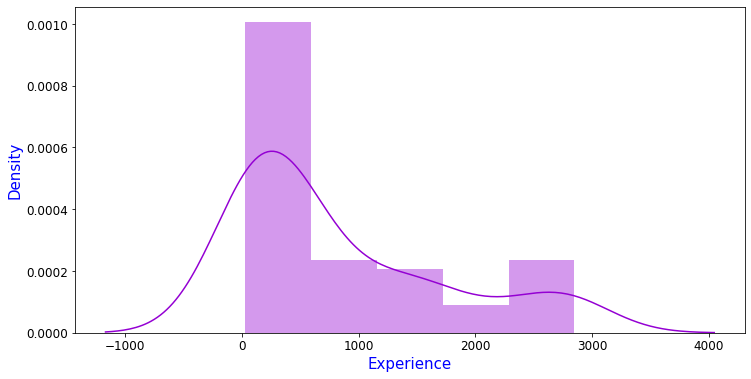

In [63]:
# To plot Distribution plot showing experience of all teams

print('Plot Showing Experience based on Games and Tournament played:-')
plt.figure(figsize=(12,6))
sns.distplot(exp_team['Experience'],color='#9400D3');
plt.show()

*Observing above data we can say,*
* *'Team 1','Team 2' and 'Team 5' are most experienced teams whereas 'Team 58', 'Team 59', and 'Team 60' have least experience.*
* *Most of teams have experience below 2000 since there are many number of observations below 1000 in the dist plot.*
* *Overall the teams have 834.48 experience on an average.*
* *If company want to select teams based on experience, it can refer the above table showing top 10 most experienced teams.*

***
## <span style="color:#9400D3">Analysing Team Launch and Highest Position Held

In [64]:
# Trimming the columns for ease

tlhp = data[['Team','TeamLaunch','HighestPositionHeld']]
tlhp.head()

,Team,TeamLaunch,HighestPositionHeld
0,Team 1,1929,1
1,Team 2,1929,1
2,Team 3,1929,1
3,Team 4,1931,1
4,Team 5,1929,1


In [65]:
# To find Oldest teams

ot = tlhp[['Team','TeamLaunch']]
print('Oldest Teams are:-')
print('Total =',len(ot[ot['TeamLaunch']==ot['TeamLaunch'].min()]))
oldt = ot[ot['TeamLaunch']==ot['TeamLaunch'].min()]
oldt

Oldest Teams are:-
Total = 10


,Team,TeamLaunch
0,Team 1,1929
1,Team 2,1929
2,Team 3,1929
4,Team 5,1929
6,Team 7,1929
7,Team 8,1929
13,Team 14,1929
44,Team 45,1929
51,Team 52,1929
53,Team 54,1929


In [66]:
# To find Newest Teams

nt = tlhp[['Team','TeamLaunch']]
print('Newest Teams are:-')
print('Total =',len(nt[nt['TeamLaunch']==nt['TeamLaunch'].max()]))
nt[nt['TeamLaunch']==nt['TeamLaunch'].max()]

Newest Teams are:-
Total = 1


,Team,TeamLaunch
55,Team 56,2016


In [67]:
# To find top 10 Newest Teams

print('Top 10 Newest Teams are:-')
nt.sort_values(by=['TeamLaunch'],ascending=False).head(10)

Top 10 Newest Teams are:-


,Team,TeamLaunch
55,Team 56,2016
43,Team 44,2014
56,Team 57,2009
36,Team 37,2007
24,Team 25,2004
42,Team 43,1999
20,Team 21,1998
47,Team 48,1996
48,Team 49,1995
38,Team 39,1994


In [68]:
# To find teams who held Highest Position of 1

hp = tlhp[['Team','HighestPositionHeld']]
print('Teams who held Highest Position of 1:-')
print('Total =',len(hp[hp['HighestPositionHeld']==hp['HighestPositionHeld'].min()]))
hph = hp[hp['HighestPositionHeld']==hp['HighestPositionHeld'].min()]
hph

Teams who held Highest Position of 1:-
Total = 9


,Team,HighestPositionHeld
0,Team 1,1
1,Team 2,1
2,Team 3,1
3,Team 4,1
4,Team 5,1
5,Team 6,1
7,Team 8,1
9,Team 10,1
10,Team 11,1


In [69]:
# To find teams who held Highest Position of 2

hp2 = tlhp[['Team','HighestPositionHeld']]
print('Teams who held Highest Position of 2:-')
print('Total =',len(hp2[hp2['HighestPositionHeld']==2]))
hph2 = hp2[hp2['HighestPositionHeld']==2]
hph2

Teams who held Highest Position of 2:-
Total = 5


,Team,HighestPositionHeld
8,Team 9,2
13,Team 14,2
14,Team 15,2
19,Team 20,2
20,Team 21,2


In [70]:
# To find Oldest teams with highest position held

print('Oldest teams with highest position of 1 held:-')
othp = oldt.merge(hph)
print('Total =',len(othp))
othp

Oldest teams with highest position of 1 held:-
Total = 5


,Team,TeamLaunch,HighestPositionHeld
0,Team 1,1929,1
1,Team 2,1929,1
2,Team 3,1929,1
3,Team 5,1929,1
4,Team 8,1929,1


Plot Showing Highest Position Held vs Team Launch :-


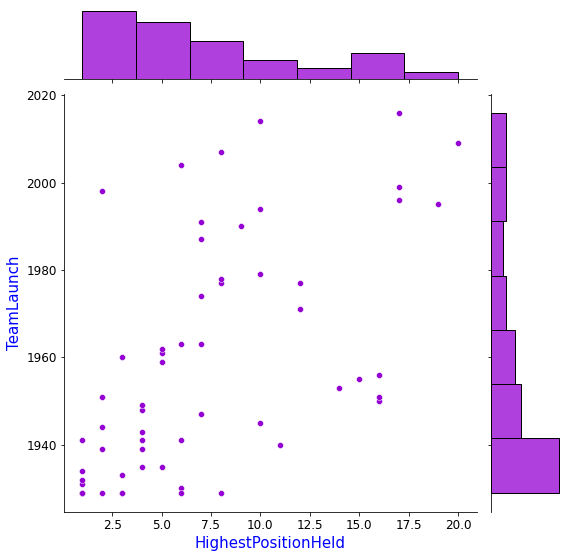

In [71]:
# To plot Joint plot showing Highest Position Held vs Team Launch of all teams

print('Plot Showing Highest Position Held vs Team Launch :-')
sns.jointplot(tlhp['HighestPositionHeld'],tlhp['TeamLaunch'],color='#9400D3',height=8);
plt.show()

*By observing above data we say,
* *There are 10 oldest teams with launch date 1929 and 'Team 56' is the newest team launched on 2016.*
* *There are 9 teams who held highest position of 1 and 5 teams who held highest position of 2.*
* *There are 5 Oldest teams who heldd highest position of 1.*
* *If company wants to oldest team with highest position held, then it can refer above table showing Oldest teams with highest position of 1 held.*

***
## <span style="color:#9400D3">Analysing the Performance of Teams

In [72]:
# Top 10 teams having high Winning Percentage and high Score Rate

t5_win_score = win_team['Winning_Percentage(%)']+srt['Score Rate']
tws = pd.DataFrame(t5_win_score,columns=['Score Rate + Winning%'])
team = pd.DataFrame(data['Team'])
t5_win_score = team.join(tws)
t5_win_score = t5_win_score.sort_values(by='Score Rate + Winning%',ascending=False)
print('Top 10 teams having high Winning Percentage and high Score Rates:-')
t5_win_score.head(10)

Top 10 teams having high Winning Percentage and high Score Rates:-


,Team,Score Rate + Winning%
0,Team 1,71.21
1,Team 2,69.15
2,Team 3,60.23
3,Team 4,57.39
4,Team 5,56.45
20,Team 21,55.99
5,Team 6,53.31
7,Team 8,51.19
10,Team 11,50.80
8,Team 9,49.35


In [73]:
# Top 5 teams having Low Winning Percentage and Low Score Rate

t5_win_score = win_team['Winning_Percentage(%)']+srt['Score Rate']
tws = pd.DataFrame(t5_win_score,columns=['Score Rate + Winning%'])
team = pd.DataFrame(data['Team'])
t5_win_score = team.join(tws)
t5_win_score = t5_win_score.sort_values(by='Score Rate + Winning%')
print('Top 10 teams having low Winning Percentage and low Score Rates:-')
t5_win_score.head()

Top 10 teams having low Winning Percentage and low Score Rates:-


,Team,Score Rate + Winning%
59,Team 60,23.80
54,Team 55,30.00
58,Team 59,32.30
56,Team 57,35.10
49,Team 50,35.89


Plot showing Winning Percentage VS Score Rates:-


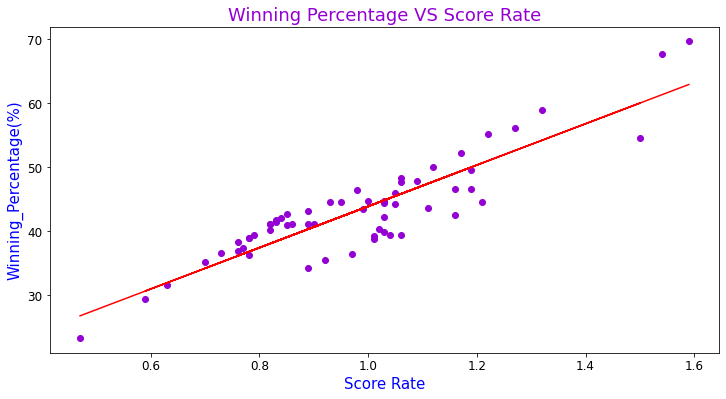

In [74]:
# Plot showing Winning Percentage VS Score Rates of all Teams

print('Plot showing Winning Percentage VS Score Rates:-')
plt.figure(figsize=(12,6))
plt.plot(srt['Score Rate'],win_team['Winning_Percentage(%)'], 'o',color='#9400D3');
m, b = np.polyfit(srt['Score Rate'],win_team['Winning_Percentage(%)'], 1)
plt.plot(srt['Score Rate'], m*srt['Score Rate'] + b,color='red');
plt.xlabel('Score Rate')
plt.ylabel('Winning_Percentage(%)')
plt.title('Winning Percentage VS Score Rate')
plt.show()

In [75]:
# Top 10 teams with high experience and high Winning Percentage

t5_exp_wp = exp_team['Experience']+win_team['Winning_Percentage(%)']
tew = pd.DataFrame(t5_exp_wp,columns=['Experience + Winning%'])
team = pd.DataFrame(data['Team'])
t5_exp_wp = team.join(tew)
t5_exp_wp = t5_exp_wp.sort_values(by='Experience + Winning%',ascending=False)
print('Top 10 teams with high experience and high Winning Percentage:-')
t5_exp_wp.head(10)

Top 10 teams with high experience and high Winning Percentage:-


,Team,Experience + Winning%
0,Team 1,2917.62
1,Team 2,2915.61
4,Team 5,2903.23
3,Team 4,2802.12
6,Team 7,2755.68
2,Team 3,2752.91
5,Team 6,2533.14
7,Team 8,2422.07
8,Team 9,2092.29
9,Team 10,1826.80


In [76]:
# Top 5 teams with Low experience and Low Winning Percentage

t5_exp_wp = exp_team['Experience']+win_team['Winning_Percentage(%)']
tew = pd.DataFrame(t5_exp_wp,columns=['Experience + Winning%'])
team = pd.DataFrame(data['Team'])
t5_exp_wp = team.join(tew)
t5_exp_wp = t5_exp_wp.sort_values(by='Experience + Winning%')
print('Top 5 teams with Low experience and Low Winning Percentage:-')
t5_exp_wp.head()

Top 5 teams with Low experience and Low Winning Percentage:-


,Team,Experience + Winning%
59,Team 60,54.33
58,Team 59,62.67
57,Team 58,67.67
56,Team 57,73.21
55,Team 56,74.53


Plot showing Winning Percentage VS Experience:-


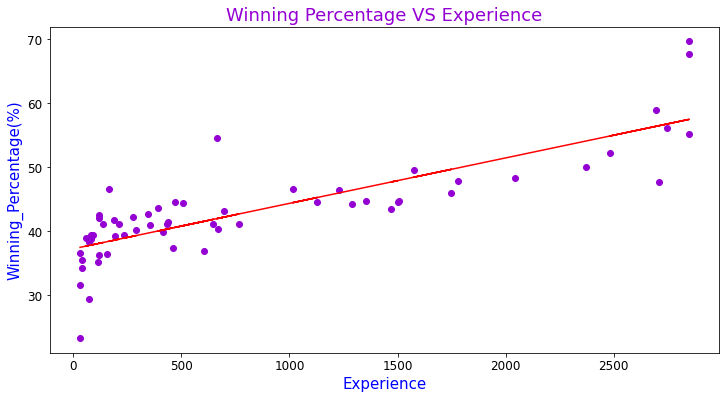

In [77]:
# Plot showing Winning Percentage VS Experience of all Teams

print('Plot showing Winning Percentage VS Experience:-')
plt.figure(figsize=(12,6))
plt.plot(exp_team['Experience'],win_team['Winning_Percentage(%)'], 'o',color='#9400D3');
m, b = np.polyfit(exp_team['Experience'],win_team['Winning_Percentage(%)'], 1)
plt.plot(exp_team['Experience'], m*exp_team['Experience'] + b,color='red');
plt.xlabel('Experience')
plt.ylabel('Winning_Percentage(%)')
plt.title('Winning Percentage VS Experience')
plt.show()

In [78]:
# Top 10 teams with high Rate of Basket Scored and high Winning Percentage

t5_rb_w = rp_team['Rate of Basket Scored']*win_team['Winning_Percentage(%)']
trw = pd.DataFrame(t5_rb_w,columns=['Basket Rate * Winning%'])
team = pd.DataFrame(data['Team'])
t5_rb_w = team.join(trw)
t5_rb_w = round(t5_rb_w.sort_values(by='Basket Rate * Winning%',ascending=False),2)
print('Top 10 teams with high Rate of Basket Scored and high Winning Percentage:-')
t5_rb_w.head(10)

Top 10 teams with high Rate of Basket Scored and high Winning Percentage:-


,Team,Basket Rate * Winning%
0,Team 1,70.73
1,Team 2,68.22
2,Team 3,27.63
3,Team 4,19.59
4,Team 5,18.61
20,Team 21,8.66
5,Team 6,6.62
7,Team 8,-0.05
8,Team 9,-4.01
10,Team 11,-4.42


In [79]:
# Top 5 teams with Low Rate of Basket Scored and Low Winning Percentage

t5_rb_w = rp_team['Rate of Basket Scored']*win_team['Winning_Percentage(%)']
trw = pd.DataFrame(t5_rb_w,columns=['Basket Rate * Winning%'])
team = pd.DataFrame(data['Team'])
t5_rb_w = team.join(trw)
t5_rb_w = round(t5_rb_w.sort_values(by='Basket Rate * Winning%'),2)
print('Top 5 teams with Low Rate of Basket Scored and Low Winning Percentage:-')
t5_rb_w.head()

Top 5 teams with Low Rate of Basket Scored and Low Winning Percentage:-


,Team,Basket Rate * Winning%
54,Team 55,-48.44
58,Team 59,-35.88
46,Team 47,-35.59
49,Team 50,-34.87
50,Team 51,-27.17


Plot showing Rate of Basket Scored VS Winning Percentage:-


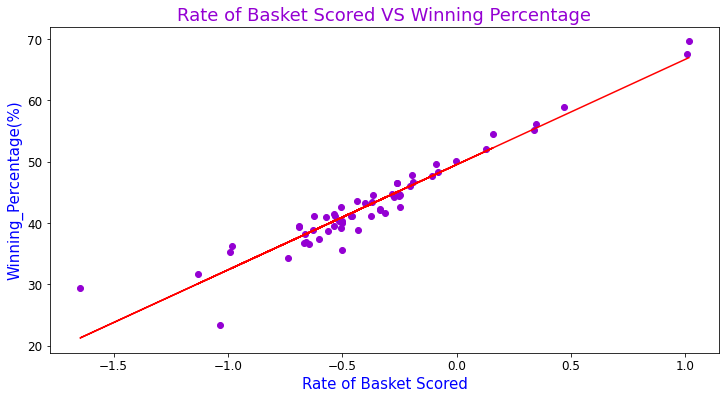

In [80]:
# Plot showing Rate of Basket Scored VS Winning Percentage of all Teams

print('Plot showing Rate of Basket Scored VS Winning Percentage:-')
plt.figure(figsize=(12,6))
plt.plot(rp_team['Rate of Basket Scored'],win_team['Winning_Percentage(%)'], 'o',color='#9400D3');
m, b = np.polyfit(rp_team['Rate of Basket Scored'],win_team['Winning_Percentage(%)'], 1)
plt.plot(rp_team['Rate of Basket Scored'], m*rp_team['Rate of Basket Scored'] + b,color='red');
plt.xlabel('Rate of Basket Scored')
plt.ylabel('Winning_Percentage(%)')
plt.title('Rate of Basket Scored VS Winning Percentage')
plt.show()

*By observing above data we can say,*
* *Plots show linear relationship between different categories.*
* *Company can select teams based on high Winning Percentage and high Score Rate.*
* *Company can choose teams based on high Experience with high Winning Percentage.*
* *Company can look for teams who have high Rate of Basket Scored with high Winning Percentage.*

***
## <span style="color:#9400D3">Know the Best and the Worst Teams Based on Overall Performance
    
 Overall Performance is calculated based on Team's Performance in the Game. Factors that are considered are as follows:-
    
   * Score Rate
   * Winning Percentage
   * Rate of Basket Scored
   * Won Tournament Championship
   * Stood as Runner-up in Tournament Championship
    
Based on these factors we can know which team had performed well and which not.

In [81]:
# Top 10 Best Teams Based on Overall Performance

t10_best = (srt['Score Rate']+rp_team['Rate of Basket Scored']+win_team['Winning_Percentage(%)']+data['TournamentChampion']+data['Runner-up'])    
t10 = pd.DataFrame(t10_best,columns=['Overall Performance'])
t_best = data.join(t10)
t10_best = round(t_best.sort_values(by='Overall Performance',ascending=False),2)
print('Top 10 Best Teams Based on Overall Performance:-')
t10_best.head(10)

Top 10 Best Teams Based on Overall Performance:-


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Overall Performance
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,128.23
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,120.16
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,78.70
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,71.79
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,69.74
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1,58.44
20,Team 21,17,970,646,266,172,208,892,789,0,1,1998,2,57.15
10,Team 11,45,1814,1530,563,392,575,2052,2188,1,5,1941,1,56.71
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1,56.19
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2,50.27


In [82]:
# Best Team based based on overall performance

print('Best Team based based on overall performance:-')
t10_best.head(1)

Best Team based based on overall performance:-


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Overall Performance
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,128.23


In [83]:
# Top 10 Worst Teams Based on Overall Performance

t10_nbest = (srt['Score Rate']+rp_team['Rate of Basket Scored']+win_team['Winning_Percentage(%)']+data['TournamentChampion']+data['Runner-up'])    
t10 = pd.DataFrame(t10_nbest,columns=['Overall Performance'])
t10_nbest = data.join(t10)
t10_nbest = round(t10_nbest.sort_values(by='Overall Performance'),2)
print('Top 10 Worst Teams Based on Overall Performance:-')
t10_nbest.head(10)

Top 10 Worst Teams Based on Overall Performance:-


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Overall Performance
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955,15,22.77
54,Team 55,2,40,68,13,14,41,70,182,0,0,1950,16,28.35
58,Team 59,1,19,30,7,5,18,51,85,0,0,1951,16,31.17
56,Team 57,1,34,38,8,10,20,38,66,0,0,2009,20,34.36
49,Team 50,4,76,108,30,16,62,145,252,0,0,1945,10,34.90
55,Team 56,1,35,38,8,11,19,36,55,0,0,2016,17,35.95
46,Team 47,4,91,116,34,16,66,181,295,0,0,1947,7,36.01
57,Team 58,1,22,30,7,8,15,37,57,0,0,1956,16,36.73
42,Team 43,4,148,152,37,37,78,155,253,0,0,1999,17,36.84
27,Team 28,18,445,586,145,143,298,607,992,0,0,1940,11,37.05


In [84]:
# Worst Team based based on overall performance

print('Worst Team based based on overall performance:-')
t10_nbest.head(1)

Worst Team based based on overall performance:-


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Overall Performance
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955,15,22.77


In [85]:
# Average Overall Performance

avp = t_best['Overall Performance'].mean()
print('Average Overall Performance =',round(avp,2))

Average Overall Performance = 46.67


In [86]:
# Probability that these top 10 best teams will win the games

p_t10 = t10_best.head(10)
p_t10 = (p_t10['WonGames']+p_t10['DrawnGames']*0.5)/p_t10['PlayedGames']
print('Probability that these top 10 best teams will win the games =',round(p_t10.sum()/10,2))

Probability that these top 10 best teams will win the games = 0.56


Plot showing Overall Performance VS Tournament:-


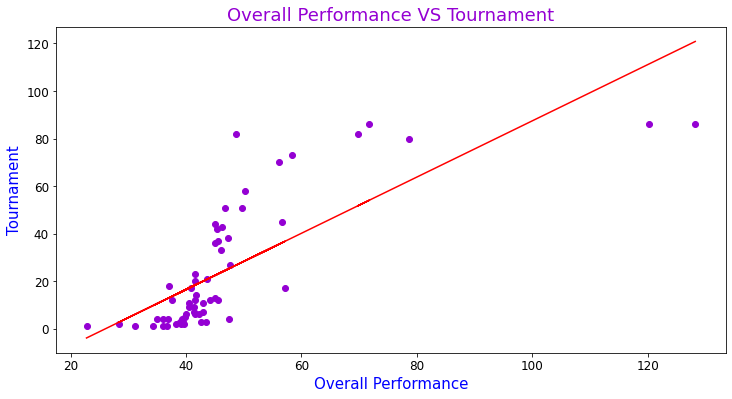

In [87]:
# Plot showing Overall Performance VS Tournament

print('Plot showing Overall Performance VS Tournament:-')
plt.figure(figsize=(12,6))

plt.plot(t_best['Overall Performance'],data['Tournament'], 'o',color='#9400D3');

m, b = np.polyfit(t_best['Overall Performance'],data['Tournament'], 1)
plt.plot(t_best['Overall Performance'], m*t_best['Overall Performance'] + b,color='red');
plt.xlabel('Overall Performance')
plt.ylabel('Tournament')
plt.title('Overall Performance VS Tournament')
plt.show()

***
## <span style="color:#9400D3">3. Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity,veracity etc. on the data points collected by the association to perform a better data analysis in future.
***

## <span style="color:#9400D3">Conclusion
    
*Observations and Analytics*
* *By observing the skewness of data we can conclude that there is high variability in the performance of teams*
* *Company may Choose or Select the teams based on varius criterias/analysis that are done above.*
* *Company should not choose or select players based on Score Rates(Not Scores), since there is not much variations among the teams*
* *Based on Winning Percentages which are calculated, Company can select the best teams.*
* *Most of teams have winning percentage between 40%-50% range.*
* *Based on Tournament Champions and Runner-ups, Company can also select teams, since we have analysed the teams having best performance in the tournaments.*
* *If company is looking for experienced teams, then it can refer experience analytics.*
* *Also there is a analysis based on Rate of Basket Scored. Based on this, company can choose teams.*<br><br>

*Recommended Teams*
* *Teams that are having the Best Performace in every criteria is mentioned above. There is 0.56 of probability that these teams will win the game. We can consider the Quality of Teams as the best. Company can refer that data for selection.*

    
**Closing Sentence:- This analytics is done to show the best possible teams for the company. Based on company's preference it can choose the best ones.**

***


### <span style="color:#9400D3">-------------------------------------------------- End of Part TWO ------------------------------------------------------- 

***
# <span style="color:#9400D3">Part THREE - **Project Based**
***

**DOMAIN:** Startup Ecosystem
<br><br>
**CONTEXT:** Company X is a EU online publisher focusing on the startups industry. The company specifically reports on the business related to
technology news, analysis of emerging trends and profiling of new tech businesses and products. Their event i.e. Startup Battlefield is the
world’s pre-eminent startup competition. Startup Battlefield features 15-30 top early stage startups pitching top judges in front of a vast live
audience, present in person and online.
<br><br>
**DATA DESCRIPTION:** CompanyX_EU.csv - Each row in the dataset is a Start-up company and the columns describe the company. ATTRIBUTE
<br><br>
INFORMATION:
1. Startup: Name of the company
2. Product: Actual product
3. Funding: Funds raised by the company in USD
4. Event: The event the company participated in
5. Result: Described by Contestant, Finalist, Audience choice, Winner or Runner up
6. OperatingState: Current status of the company, Operating ,Closed, Acquired or IPO
<br><br>
**PROJECT OBJECTIVE:** Analyse the data of the various companies from the given dataset and perform the tasks that are specified in the
below steps. Draw insights from the various attributes that are present in the dataset, plot distributions, state hypotheses and draw
conclusions from the dataset.
<br><br>
Steps and tasks:
<br>
1. Data warehouse:

 • Read the CSV file.
<br><br>
2. Data exploration:

 • Check the datatypes of each attribute.

 • Check for null values in the attributes.
<br><br>
3. Data preprocessing & visualisation:

 • Drop the null values.

 • Convert the ‘Funding’ features to a numerical value.

 • Plot box plot for funds in million.

 • Get the lower fence from the box plot.

 • Check number of outliers greater than upper fence.

 • Drop the values that are greater than upper fence.

 • Plot the box plot after dropping the values.

 • Check frequency of the OperatingState features classes.

 • Plot a distribution plot for Funds in million.

 • Plot distribution plots for companies still operating and companies that closed.
<br><br>
4. Statistical analysis:

 • Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?

        Write the null hypothesis and alternative hypothesis.

        Test for significance and conclusion

 • Make a copy of the original data frame.

 • Check frequency distribution of Result variable.

 • Calculate percentage of winners that are still operating and percentage of contestants that are still operating

 • Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:

        Write the null hypothesis and alternative hypothesis.

        Test for significance and conclusion
 • Check distribution of the Event variable.
 
 • Select only the Event that has disrupt keyword from 2013 onwards.

 • Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from
2013 onwards.

 • Plot the distribution plot comparing the 3 city events.
<br><br>
5. Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform
a better data analysis.

***
## <span style="color:#9400D3">1. Data Warehouse

### <span style="color:#9400D3">* Reading the CSV File

In [88]:
# Loading file and creating dataframe
start_up = pd.read_csv('CompanyX_EU.csv')  

# Getting shape of dataframe
a = start_up.shape    
print('Data consist:-\n Number of Rows    =',a[0],'\n Number of Columns =',a[1])

start_up.head(11)

Data consist:-
 Number of Rows    = 662 
 Number of Columns = 6


,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
7,8020 Media,8020media.com,NaN,TC40 2007,Contestant,Operating
8,About Last Night,aboutlastnight.net,NaN,Disrupt NYC 2012,Contestant,Operating
9,Adgregate Markets,adgregate.com,NaN,TC50 2008,Contestant,Operating


***
## <span style="color:#9400D3">2. Data Exploration

### <span style="color:#9400D3">* Check the Datatypes of each Attribute

In [89]:
print('\nData Types of Each Attribute:-')
start_up.dtypes.to_frame('Data Type')    # Checking data types


Data Types of Each Attribute:-


,Data Type
Startup,object
Product,object
Funding,object
Event,object
Result,object
OperatingState,object


### <span style="color:#9400D3">* Check for Null values in the Attributes.

In [90]:
print('Null values in the Attributes:-')
start_up.isnull().sum().to_frame('Null Values')     # Checking Null/NaN values of each attribute

Null values in the Attributes:-


,Null Values
Startup,0
Product,6
Funding,214
Event,0
Result,0
OperatingState,0


***
## <span style="color:#9400D3">3. Data Preprocessing & Visualisation

### <span style="color:#9400D3"> *  Drop the Null values.

In [91]:
# Droping NaN values of data
start_up.dropna(inplace=True)

print('Null values in the Attributes:-')
start_up.isnull().sum().to_frame('Null Values')

Null values in the Attributes:-


,Null Values
Startup,0
Product,0
Funding,0
Event,0
Result,0
OperatingState,0


**Comments:-**

   * *Complete removal of data with missing values results in robust and highly accurate model.*

### <span style="color:#9400D3">* Convert the ‘Funding’ features to a Numerical value.

In [92]:
# Step 1: Knowing the things related to Funding

start_up[['Startup','Funding']].head(10)

,Startup,Funding
1,3DLT,$630K
3,3Dprintler,$1M
5,5to1,$19.3M
6,8 Securities,$29M
10,AdhereTech,$1.8M
11,AdRocket,$1M
13,Agrilyst,$1M
14,Aiden,$750K
15,AirBoxLab,$17.9K
16,Aircall,$11.6M


**Comments:-**
 * *We have different symbols like $, K etc. in Funding.*
 
 * *First we should remove $ .*
 * *Then we add zeros to the numbers that have symbols K,M,B with respective number of zeros.*

In [93]:
# Step 2: Converting 'Funding' attribute to Numerical Values

# First we remove $ symbol from data

start_up['Funding']=start_up['Funding'].replace({'\$': ''},regex=True)

# Next replacing other symbols by their original values
start_up['Funding']=(start_up['Funding'].replace(r'[KMB]+$', '', regex=True).astype(float) * 
                     start_up['Funding'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).
                     replace(['K','M','B'], [10**3, 10**6,10**9]).astype(int))

start_up[['Startup','Funding']].head(10)

,Startup,Funding
1,3DLT,630000.0
3,3Dprintler,1000000.0
5,5to1,19300000.0
6,8 Securities,29000000.0
10,AdhereTech,1800000.0
11,AdRocket,1000000.0
13,Agrilyst,1000000.0
14,Aiden,750000.0
15,AirBoxLab,17900.0
16,Aircall,11600000.0


**Comments:-**
 * *Now we have Funding in Numerical form.*

### <span style="color:#9400D3">* Plot box plot for Funds in million.

Box plot for Funds in million:-


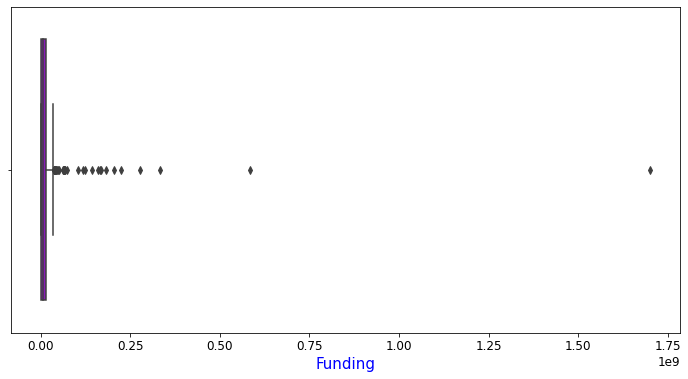

In [94]:
# Getting Funds in millions 

Fund_M = start_up[start_up['Funding']>999999]

# Plotting Box Plot
print('Box plot for Funds in million:-')
plt.figure(figsize=(12,6))
sns.boxplot(Fund_M['Funding'],color="#9400D3"); 

**Comments:-**
 
 * *The Plot couldn't be observed clearly since there are outliers with huge values!*

### <span style="color:#9400D3">* Get the Lower fence from the Box plot.

In [95]:
# Getting IQR 
Q1 = Fund_M['Funding'].quantile(0.25)
Q3 = Fund_M['Funding'].quantile(0.75)
IQR = Q3 - Q1    # IQR --> interquartile range. 

# Calculating lower fence
Lower_Fence = Q1 - 1.5*IQR

print('Lower Fence =',Lower_Fence)

Lower Fence = -18625000.0


### <span style="color:#9400D3">* Check number of Outliers greater than Upper fence.

In [96]:
# Calculating upper fence
Upper_Fence = Q3 + 1.5*IQR

fund_UF = Fund_M[Fund_M['Funding']>Upper_Fence]

print('Number of Outliers greater than Upper fence =',fund_UF['Funding'].shape[0])


Number of Outliers greater than Upper fence = 34


### <span style="color:#9400D3">* Drop the values that are greater than Upper fence.

In [97]:
Fund_M = Fund_M[Fund_M['Funding']<=Upper_Fence] #Dropping values > Upper fence

### <span style="color:#9400D3">* Plot the Box plot after Dropping the values.

Box plot after Dropping the values:-


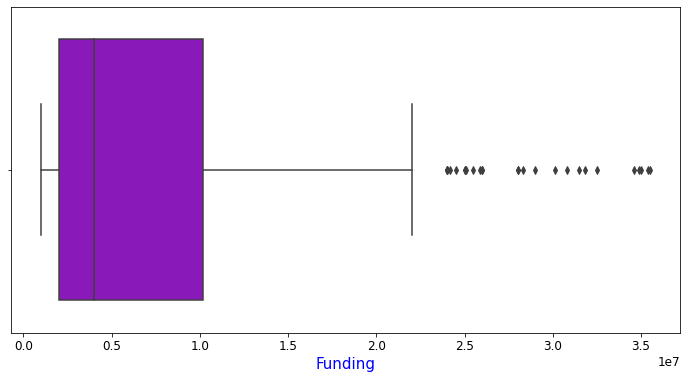

In [98]:
print('Box plot after Dropping the values:-')
plt.figure(figsize=(12,6))
sns.boxplot(Fund_M['Funding'],color="#9400D3"); 

**Comments:-**

* *Since we have dropped values greater than upper fence, we can see box plot clearly.*
* *Observing box plot we can say there is a positive skewness in Funding.*

### <span style="color:#9400D3">* Check Frequency of the OperatingState features classes.

In [99]:
# Getting  Frequency of the OperatingState features classes.
OS_frq = start_up['OperatingState'].value_counts().to_frame(name = 'Companies per OperatingState')
print('Frequency of the OperatingState features classes:-')
OS_frq

Frequency of the OperatingState features classes:-


,Companies per OperatingState
Operating,319
Acquired,66
Closed,57
Ipo,4


Plot showing frequencies of OperatingState:-


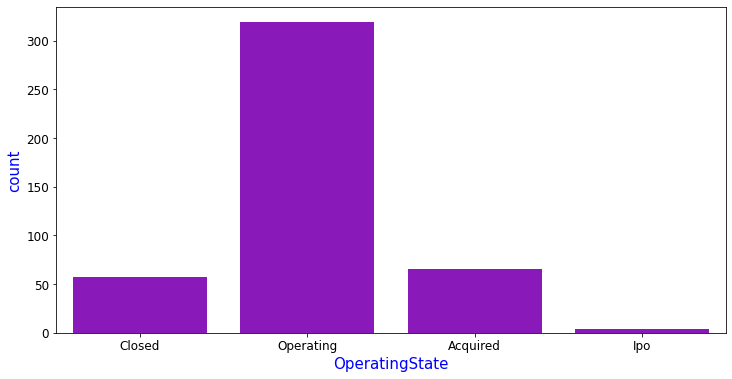

In [100]:
# Plotting the frequencies of OperatingState attribute

print('Plot showing frequencies of OperatingState:-')
plt.figure(figsize=(12,6))
sns.countplot(start_up['OperatingState'],color="#9400D3");

### <span style="color:#9400D3">* Plot a Distribution plot for Funds in million.

Plot showing distribution of Funds in million:-


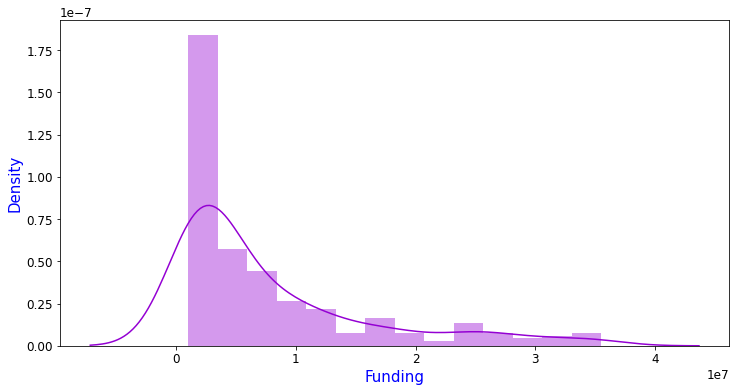

In [101]:
plt.figure(figsize=(12,6))
print('Plot showing distribution of Funds in million:-')
sns.distplot(Fund_M['Funding'],color="#9400D3");
# By observing the plot we can say its positively skewed!

### <span style="color:#9400D3">* Plot Distribution plots for Companies still operating and Companies that closed.

Plot showing  Companies still operating and Companies that closed:-


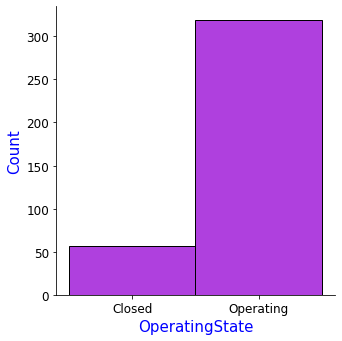

In [102]:
# Getting Companies still operating and Companies that are closed
op_cl = start_up[start_up['OperatingState']!='Acquired']
op_cl = op_cl[op_cl['OperatingState']!='Ipo']
print('Plot showing  Companies still operating and Companies that closed:-')
sns.displot(op_cl['OperatingState'],color="#9400D3"); 

**Comments:-**

 * *By observing above distribution we can say, Number of Companies still operating is greater than Companies that are closed*

***
## <span style="color:#9400D3">4. Statistical Analysis

### <span style="color:#9400D3">* Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?

   * Write the null hypothesis and alternative hypothesis.
    
   * Test for significance and conclusion

 The Null hypothesis and Alternative hypothesis are:-
 
**Null Hypothesis (H0) :-** There is no significant difference between Funds raised by companies that are still operating vs companies that closed down

**Alternative Hypothesis (H1) :-** There is significant difference between Funds raised by companies that are still operating vs companies that closed down

In [103]:
# Test for Significance and Conclusion

operating = op_cl[op_cl['OperatingState']=='Operating']   # Operating Companies
closed = op_cl[op_cl['OperatingState']=='Closed']    # Closed Companies

# Performing T-Test
t_stats,p_value = ttest_ind(operating['Funding'],closed['Funding'])

print('\nT-Statistic =',round(t_stats,2))
print('P_value     =',round(p_value,2))

print('\nStatistical Decision:-')
if p_value > 0.05:
    print('''  Null Hypothesis (H0) is Accepted :- There is no significant difference between Funds raised by 
                                      companies that are still operating vs companies that closed down ''')
else:
    print('''  Null Hypothesis (H0) is Rejected OR Alternative Hypothesis (H1) is Accepted:- There is significant difference between Funds raised by companies 
                                      that are still operating vs companies that closed down ''')
    



T-Statistic = 1.14
P_value     = 0.26

Statistical Decision:-
  Null Hypothesis (H0) is Accepted :- There is no significant difference between Funds raised by 
                                      companies that are still operating vs companies that closed down 


### <span style="color:#9400D3">* Make a Copy of the Original data frame.

In [104]:
# Making a copy of Original Data Frame
start_up2 = start_up.copy()

start_up2.head()

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,630000.0,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,1000000.0,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,19300000.0,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,29000000.0,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,1800000.0,Hardware Battlefield 2014,Contestant,Operating


### <span style="color:#9400D3">* Check Frequency Distribution of Result variable.

In [105]:
# Getting Frequency Distribution of Result variable
Result_frq = start_up2['Result'].value_counts().to_frame(name = 'Companies per Result')
print('Frequency Distribution of Result variable:-')
Result_frq 

Frequency Distribution of Result variable:-


,Companies per Result
Contestant,312
Finalist,65
Audience choice,25
Winner,25
Runner up,19


Plot showing Frequency Distribution of Result variable:-


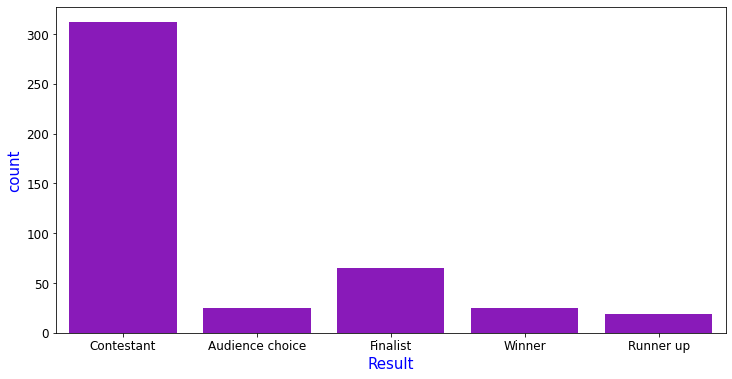

In [106]:
# Plotting the Frequency Distribution of Result variable

print('Plot showing Frequency Distribution of Result variable:-')
plt.figure(figsize=(12,6))
sns.countplot(start_up2['Result'],color="#9400D3");

### <span style="color:#9400D3">* Calculate Percentage of Winners that are still operating and Percentage of Contestants that are still operating

In [107]:
# Getting Operating Companies
still_operate = start_up2[start_up2['OperatingState']=='Operating']  

# Getting winners and contesttants who are operating
winner = still_operate[still_operate['Result']=='Winner']
contestant = still_operate[still_operate['Result']=='Contestant']

# Calculating Percentages of winners and contestants
percent_winner = round((len(winner)/len(still_operate))*100,2)
percent_contestant = round((len(contestant)/len(still_operate))*100,2)

print('Percentage of Winners that are still operating     =',percent_winner,'%')
print('Percentage of Contestants that are still operating =',percent_contestant,'%')

Percentage of Winners that are still operating     = 5.64 %
Percentage of Contestants that are still operating = 67.08 %


Plot showing Distribution of Result variable who are still operating:-


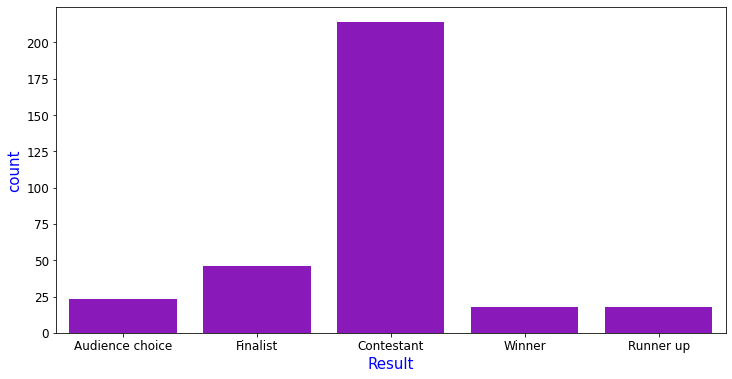

In [108]:
# Plotting the Frequency Distribution of Result variable of companies who sre still operating

print('Plot showing Distribution of Result variable who are still operating:-')
plt.figure(figsize=(12,6))
sns.countplot(still_operate['Result'],color="#9400D3");

### <span style="color:#9400D3">* Write your Hypothesis comparing the Proportion of companies that are operating between winners and contestants:
  * Write the null hypothesis and alternative hypothesis.
  * Test for significance and conclusion

The Null hypothesis and Alternative hypothesis are:-
 
**Null Hypothesis (H0) :-** Proportions of companies that are operating between winners and contestants are Equal

**Alternative Hypothesis (H1) :-** Proportions of companies that are operating between winners and contestants are Not Equal

In [109]:
# Getting winner and contestant counts
winner_count = len(winner)   # Number of Operating Winner
contestant_count = len(contestant)  # Number of Operating Contestants

# We get this information from Frequency Distribution of Result variable which is shown above
T_winner = 25  # Number of winners in whole data
T_contestant = 312 # Number of contestants in whole data

print('Proportion of Operating Winners     =',round(winner_count/T_winner,2))
print('Proportion of Operating Contestants =',round(contestant_count/T_contestant,2))

# Performing Z-Test
z_stats,p_value = proportions_ztest([winner_count,contestant_count],[T_winner,T_contestant])

print('\nZ-Statistic =',round(z_stats,2))
print('P_value     =',round(p_value,2))

print('\nStatistical Decision:-')
if p_value > 0.05:
    print('''  Null Hypothesis (H0) is Accepted :- Proportions of companies that are operating between winners 
                                      and contestants are Equal ''')
else:
    print('''  Null Hypothesis (H0) is Rejected OR Alternative Hypothesis (H1) is Accepted:-  Proportions of 
                                      companies that are operating between winners & contestants are Not Equal''')

Proportion of Operating Winners     = 0.72
Proportion of Operating Contestants = 0.69

Z-Statistic = 0.35
P_value     = 0.72

Statistical Decision:-
  Null Hypothesis (H0) is Accepted :- Proportions of companies that are operating between winners 
                                      and contestants are Equal 


### <span style="color:#9400D3">* Check Distribution of the Event variable.

In [110]:
# Getting Distribution of Event variable
event_dist = start_up['Event'].value_counts().to_frame(name = 'Companies per Event')
print('Distribution of the Event variable:-')
event_dist

Distribution of the Event variable:-


,Companies per Event
TC50 2008,31
TC40 2007,30
TC50 2009,26
Disrupt SF 2011,24
Disrupt NYC 2013,22
Disrupt SF 2013,22
Disrupt NYC 2012,21
Disrupt NY 2015,21
Disrupt SF 2012,20
Disrupt SF 2014,19


Plot showing Distribution of the Event variable:-


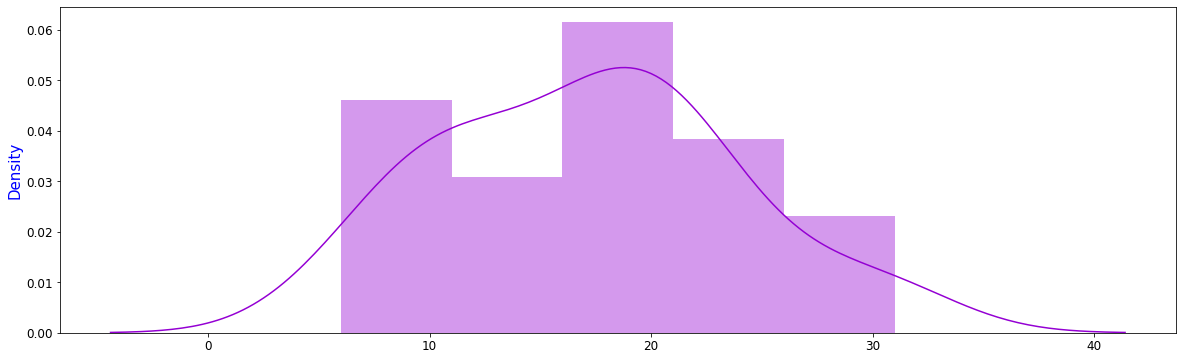

In [111]:
# Plotting the distribution of the Event variable

print('Plot showing Distribution of the Event variable:-')
plt.figure(figsize=(20,6))
sns.distplot(event_dist,color="#9400D3");

### <span style="color:#9400D3">* Select only the Event that has Disrupt keyword from 2013 onwards.

In [112]:
key1 = start_up[start_up.Event.str.contains('Disrupt')]
event = key1[key1.Event.str.contains('2014') | key1.Event.str.contains('2015') | key1.Event.str.contains('2016')]

print('Event that has Disrupt keyword from 2013 Onwards:-')
event.head(10)    # Showing only 10 values to make observation easy

Event that has Disrupt keyword from 2013 Onwards:-


,Startup,Product,Funding,Event,Result,OperatingState
3,3Dprintler,3dprintler.com,1000000.0,Disrupt NY 2016,Audience choice,Operating
13,Agrilyst,agrilyst.com,1000000.0,Disrupt SF 2015,Winner,Operating
14,Aiden,aiden.ai,750000.0,Disrupt London 2016,Contestant,Operating
16,Aircall,aircall.io,11600000.0,Disrupt SF 2015,Contestant,Operating
18,AirHelp,airhelp.com,12200000.0,Disrupt NYC 2014,Contestant,Operating
46,Ava,avawomen.com,12300000.0,Disrupt SF 2015,Contestant,Operating
51,Beam,beam.pro,520000.0,Disrupt NY 2016,Winner,Acquired
52,Beartooth,beartooth.com,2900000.0,Disrupt SF 2014,Contestant,Operating
55,Behold.ai,behold.ai,20000.0,Disrupt NY 2016,Contestant,Operating
59,BioBots,biobots.io,2800000.0,Disrupt NY 2015,Finalist,Operating


### <span style="color:#9400D3">* Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from 2013 onwards.

The Null hypothesis and Alternative hypothesis are:-
 
**Null Hypothesis (H0) :-** The Means of funds raised by companies across NY, SF and EU events from 2013 onwards are Equal.

**Alternative Hypothesis (H1) :-** The Means of funds raised by companies across NY, SF and EU events from 2013 onwards are Not Equal.

<br>
Here we take Significance Level α = 0.05

In [113]:
# Getting the required data as per demand
event_NYC = event[~event.Event.str.contains('NYC')]
event_fund = event_NYC[event_NYC.Event.str.contains('NY') | event_NYC.Event.str.contains('SF') | 
                       event_NYC.Event.str.contains('EU')]    

# Creating dataframe having required attributes 
df_event = event_fund[['Event','Funding']]

df_event.head()

,Event,Funding
3,Disrupt NY 2016,1000000.0
13,Disrupt SF 2015,1000000.0
16,Disrupt SF 2015,11600000.0
46,Disrupt SF 2015,12300000.0
51,Disrupt NY 2016,520000.0


In [114]:
# Calculating P value using ANOVA table
mod = ols('Funding ~ Event', data = df_event).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('ANOVA Table:-')
aov_table

ANOVA Table:-


,sum_sq,df,F,PR(>F)
Event,7.095446e+13,5.0,1.227926,0.302034
Residual,1.109452e+15,96.0,NaN,NaN


By observing above Anova Table, we get **P_Value = 0.302034** which is Greater than Significance Level **α = 0.05**

<br>

**Statistical Decision:-**

   Null Hypothesis (H0) is Accepted :- The Means of funds raised by companies across NY, SF and EU events from 2013 onwards are Equal.

### <span style="color:#9400D3">* Plot the Distribution plot comparing the 3 city events.

Plot showing Distribution plot comparing the 3 city events:-


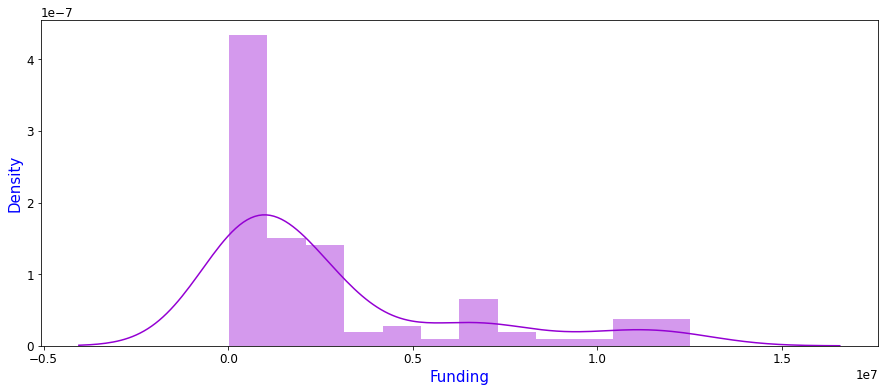

In [115]:
# Plotting the distribution plot comparing the 3 city events

print('Plot showing Distribution plot comparing the 3 city events:-')
plt.figure(figsize=(15,6))
sns.distplot(df_event['Funding'],color="#9400D3");

***


In [116]:
# Knowing about Funding Attribute
print('Number of Companies based on funds:-')
print(' Billion dollarss          =',len(start_up[start_up['Funding']>1000000000]))
print(' Million dolllars          =',len(start_up[start_up['Funding']>=1000000]))
print(' Less than Million dollars =',len(start_up[start_up['Funding']<1000000]))

Number of Companies based on funds:-
 Billion dollarss          = 1
 Million dolllars          = 310
 Less than Million dollars = 136


***
## <span style="color:#9400D3">5. Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform a better data analysis.

**Observations:-**

* *On observing box plot of Fundings we say that there are many companies with huge fundings, since there are many outliers found.*
* *There are 310 companies with funding over million dollars and 136 companies less than million dollars.*
* *There is only one commpany whose funding is above 1 billion dollars.*
* *Observing the attribute Operating state we can say, most of companies are still operating.*
* *Proportions of companies that are operating between winners and contestants are Equal.*
* *There is no significant difference between Funds raised by companies that are still operating vs companies that closed down.*
* *The Means of funds raised by companies across NY, SF and EU events from 2013 onwards are Equal.*
* *Very less number of companies are in initial public offering state.*

***

### <span style="color:#9400D3">------------------------------------------------- End of Part THREE -----------------------------------------------------

# <span style="color:#9400D3">--------------------- End of AIML MODULE PROJECT 1 ---------------------
  
------------------------------------------------------------------------------**THANK YOU😊**----------------------------------------------------------------------------------
    
***
***